<a href="https://colab.research.google.com/github/wasimsse/RealTime-Object-Detection-Colab/blob/main/realtime_object_detection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio
!pip install opencv-python


In [ ]:
# Import necessary libraries
import cv2
import torch

def load_model():
    # Load the pre-trained YOLOv5 model
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
    return model

def realtime_detection(model):
    # Open a handle to the default webcam
    cap = cv2.VideoCapture(0)

    try:
        while True:
            # Capture frame-by-frame
            ret, frame = cap.read()
            if not ret:
                break

            # Perform detection
            results = model(frame)

            # Render the results on the frame
            frame = results.render()[0]

            # Display the resulting frame
            cv2.imshow('YOLOv5 Real-Time Object Detection', frame)

            # Break the loop with the 'q' key
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    finally:
        # When everything is done, release the capture
        cap.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    model = load_model()
    realtime_detection(model)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-22 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-22 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded


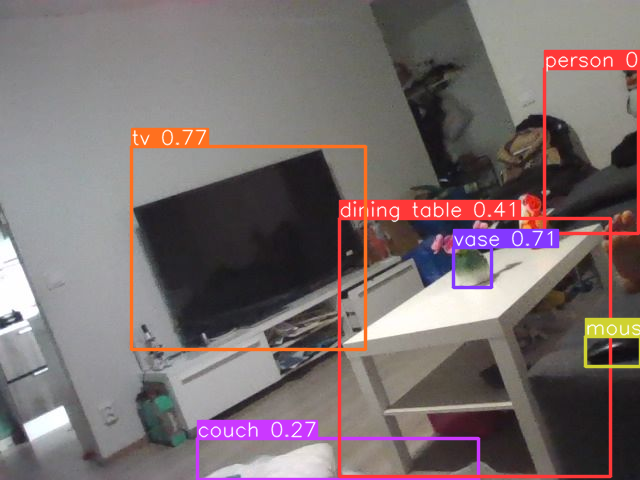

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Load the model (assuming you've already done this)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load the image
img = Image.open(filename)

# Perform inference
results = model(img)

# Display results
results.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-22 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


<IPython.core.display.Javascript object>

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-22 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


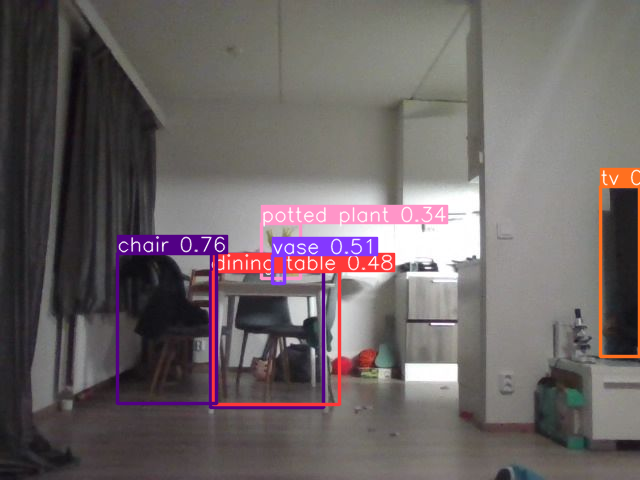

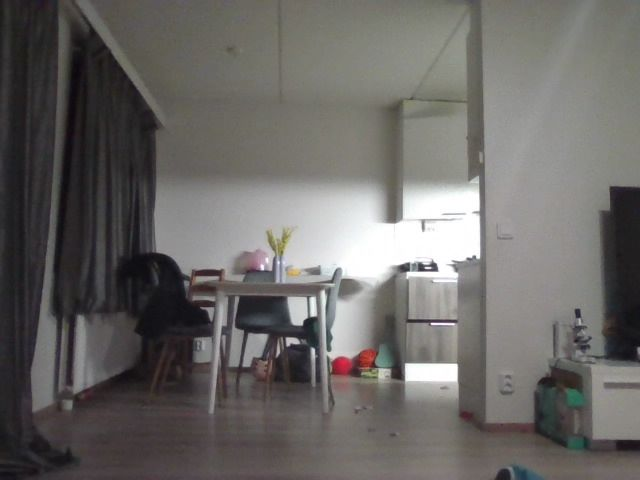

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import torch
import IPython

# Function to capture an image from the webcam
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Capture an image from the webcam
filename = take_photo()

# Perform object detection
img = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)(filename)
img.show()

# Display the image with detected objects
display(Image(filename))
